# NBA 2022-23 Regular Season Summary Report Project
---

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Reviewing Datasets**

Audited and determined which datasets would be used for analysis and visualization.

In [ ]:
official = pd.read_csv('nba database 4:12/archive/csv/officials.csv') #list of nba officials
official

In [ ]:
official.info()

In [ ]:
common = pd.read_csv('nba database 4:12/archive/csv/common_player_info.csv')
common #quick info on players' background

In [ ]:
common.info()

In [ ]:
draft_comb = pd.read_csv('nba database 4:12/archive/csv/draft_combine_stats.csv') 
draft_comb #info on draft combine

In [ ]:
draft_comb.info()

In [ ]:
draft_hist = pd.read_csv('nba database 4:12/archive/csv/draft_history.csv') 
draft_hist #does not include undrafted players (ex. Austin Reaves)

In [ ]:
draft_hist.loc[draft_hist.player_name == "Austin Reaves"] #to verify that undrafted players are not included

In [ ]:
game_info = pd.read_csv('nba database 4:12/archive/csv/game_info.csv') 
game_info #game history dates up to 3/12/23

In [ ]:
game_sum = pd.read_csv('nba database 4:12/archive/csv/game_summary.csv') 
game_sum

In [ ]:
game = pd.read_csv('nba database 4:12/archive/csv/game.csv') 
game

In [ ]:
game.info()

In [ ]:
inactive = pd.read_csv('nba database 4:12/archive/csv/inactive_players.csv') 
inactive

In [ ]:
inactive.info()

In [ ]:
line = pd.read_csv('nba database 4:12/archive/csv/line_score.csv') 
line #similar to game csv file, but this one includes the line scores

In [ ]:
line.tail() #also has games up to 3/12/23 

In [ ]:
line.info()

In [ ]:
other = pd.read_csv('nba database 4:12/archive/csv/other_stats.csv') 
other

In [ ]:
other.tail()

In [ ]:
other.info()

In [ ]:
player = pd.read_csv('nba database 4:12/archive/csv/player.csv') 
player

In [ ]:
player.info()

In [ ]:
team_details = pd.read_csv('nba database 4:12/archive/csv/team_details.csv') 
team_details

In [ ]:
team_details.info()

In [ ]:
team_hist = pd.read_csv('nba database 4:12/archive/csv/team_history.csv') 
team_hist

In [ ]:
team_info = pd.read_csv('nba database 4:12/archive/csv/team_info_common.csv') 
team_info

In [ ]:
team_info.info()

In [ ]:
team = pd.read_csv('nba database 4:12/archive/csv/team.csv') 
team 

In [ ]:
team.info()

In [ ]:
win_lose = pd.read_csv('W_L Stats.csv') 
win_lose

## **Cleaning the Datasets**

This also included collecting the missing games after 3/12.

In [ ]:
testing3 = game.duplicated()
testing3.value_counts()

In [ ]:
testing4 = line.duplicated()
testing4.value_counts()

Looked for the first game of the 2022-2023 regular season.

In [ ]:
line.game_sequence

In [ ]:
line.loc[line.game_date_est=='2022-10-18 00:00:00']

After finding the first game, I created a new dataframe to store it and the games afterwards.

In [ ]:
line2 = line.iloc[59790:] #created new variable that represents current season up until 3/12/23
line2

In [ ]:
line2.info() #no nulls

Filtered out the columns not needed.

In [ ]:
line3 = line2.loc[:,['game_date_est', 'team_abbreviation_home','team_nickname_home','team_wins_losses_home','pts_home','team_abbreviation_away','team_nickname_away','team_wins_losses_away','pts_away']]
line3

In [ ]:
line3.info()

Imported the missing games from another source. Reviewed (and cleaned if needed) it before combining the data.

In [ ]:
missing = pd.read_csv('missing games - games after 3_12.csv')
missing

In [ ]:
missing.info()

In [ ]:
test_missing = missing.duplicated()
test_missing.value_counts()

In [ ]:
new_line = pd.concat([line3, missing])
new_line

Note: combining the two dataframes can also be achieved through the **append()** function.

new_line = line3.append(missing)

In [ ]:
new_line.info()

Filtered **new_line** to keep the necessary columns. Updated **missing** to have consistent team name format.

In [ ]:
new_line2 = new_line.loc[:,['game_date_est','team_abbreviation_home','team_nickname_home','team_wins_losses_home','pts_home','team_abbreviation_away','team_nickname_away','team_wins_losses_away','pts_away']]
new_line2

In [ ]:
new_line2.count()

In [ ]:
new_line2.info()

In [ ]:
new_line2.to_csv('completed_games.csv')

Splitting the **Overall** column from **win_lose** pd into 2 separate columns (**Wins** and **Losses**).

In [ ]:
split_win_loss = win_lose.loc[:,['Team', 'Overall']]
split_win_loss

In [ ]:
split_win_loss[['Wins','Losses']] = split_win_loss.Overall.str.split('-',expand = True)
split_win_loss

Created a modified version of "complete_gamed" file to have a proper date format.

In [ ]:
new_complete = pd.read_csv('completed_games_2.csv')
new_complete 

In [ ]:
new_complete.info()

Incorporated a datatset about **stats** per game.

In [ ]:
stats = pd.read_csv('Per Game Stats.csv')
stats

In [ ]:
stats.info()

In [ ]:
test_stats = stats.duplicated()
test_stats.value_counts()

## **Illustrating the Data**

### Total Wins

First the dataframe needed to be sorted in ascending order by **Wins** before creating the visual.


In [ ]:
sort_split = split_win_loss.sort_values(by = 'Wins')
sort_split

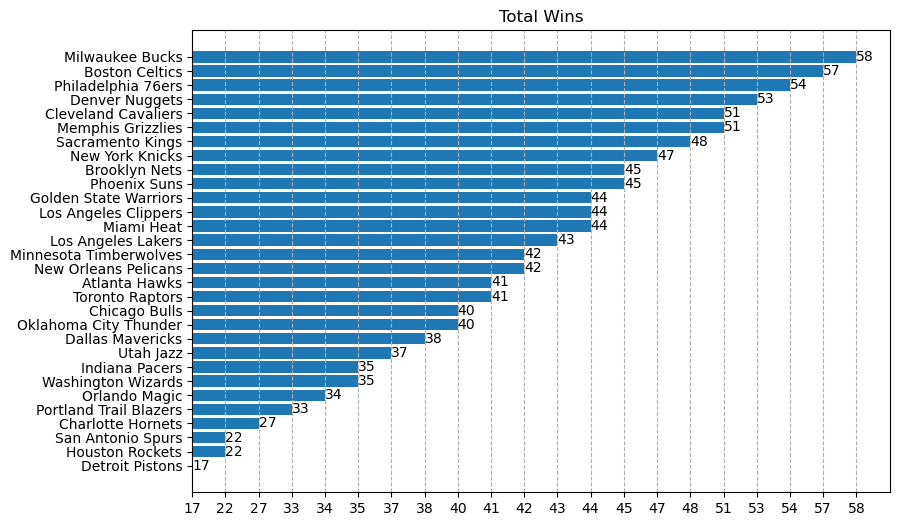

In [314]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_split.Team, sort_split.Wins)

#making the horizontal bar
bar = ax1.barh(sort_split.Team, sort_split.Wins)

plt.title('Total Wins')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_split.Wins):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')

### Field Goals 

Similar to previous visual, the data will first be sorted by field goals. The upcoming visuals will also follow similar steps.

In [ ]:
sort_field = stats.sort_values(by = 'FG', ascending= False)
sort_field

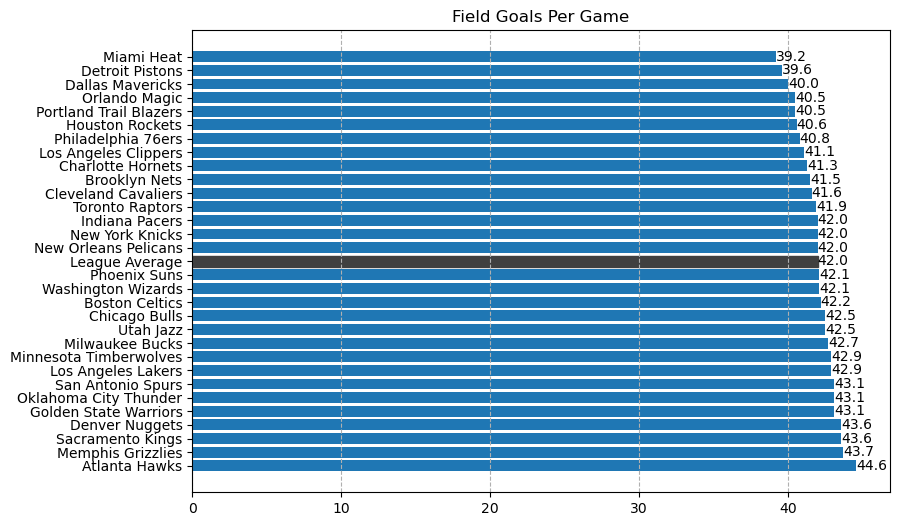

In [313]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_field.Team, sort_field.FG)

#making the horizontal bar
bar = ax1.barh(sort_field.Team, sort_field.FG)
bar[15].set_color('#404040') #highlight the average

plt.title('Field Goals Per Game')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_field.FG):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')

### Rebounds

In [ ]:
sort_rebound = stats.sort_values(by = 'TRB', ascending = False)
sort_rebound

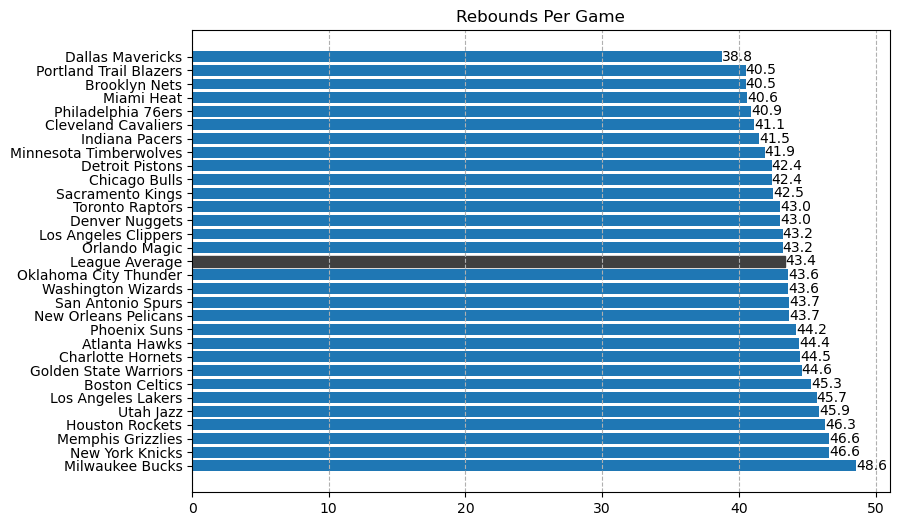

In [312]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_rebound.Team, sort_rebound.TRB)

#making the horizontal bar
bar = ax1.barh(sort_rebound.Team, sort_rebound.TRB)
bar[15].set_color('#404040') #highlight the average

plt.title('Rebounds Per Game')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_rebound.TRB):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')

### Free Throws

In [ ]:
sort_throw = stats.sort_values(by = 'FT', ascending = False)
sort_throw

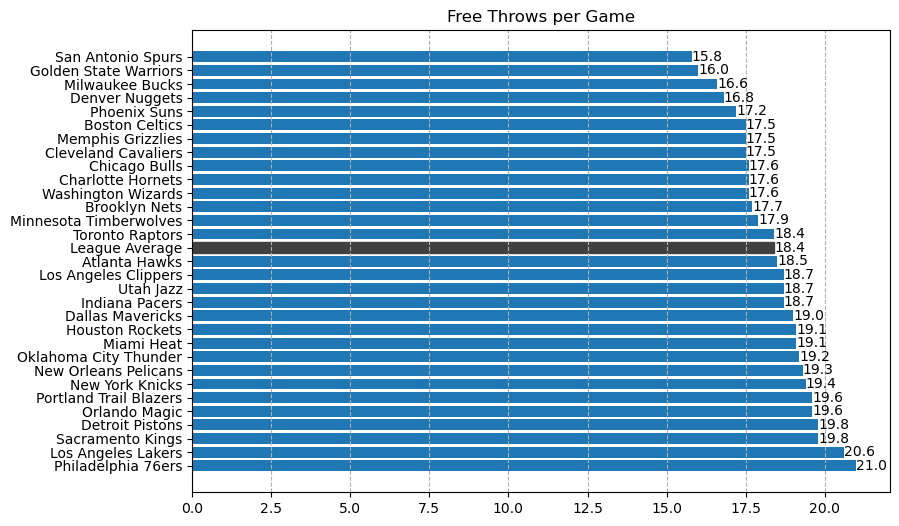

In [311]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_throw.Team, sort_throw.FT)

#making the horizontal bar
bar = ax1.barh(sort_throw.Team, sort_throw.FT)
bar[16].set_color('#404040') #highlight the average

plt.title('Free Throws per Game')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_throw.FT):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')

### Blocks

In [ ]:
sort_block = stats.sort_values(by= 'BLK', ascending = False)
sort_block

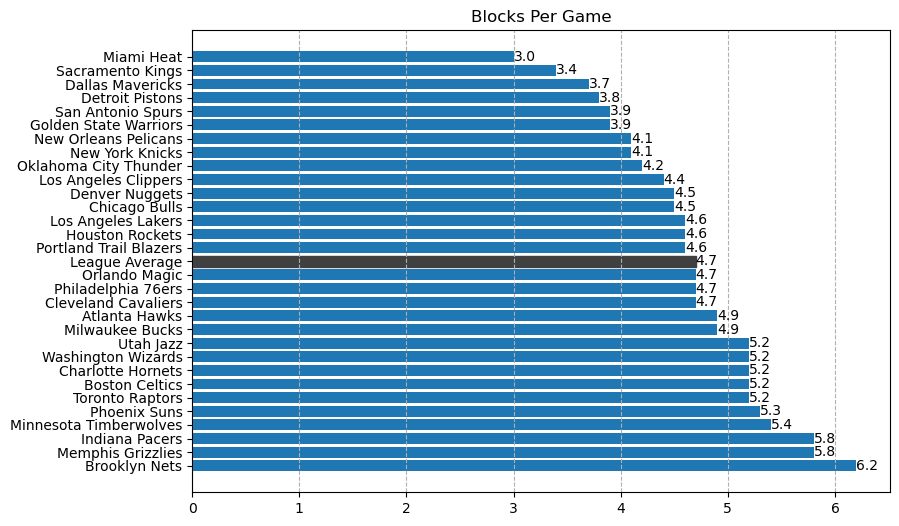

In [310]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_block.Team, sort_block.BLK)

#making the horizontal bar
bar = ax1.barh(sort_block.Team, sort_block.BLK)
bar[15].set_color('#404040') #highlight the average

plt.title('Blocks Per Game')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_block.BLK):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')

### Assists

In [ ]:
sort_assist = stats.sort_values(by= 'AST', ascending = False)
sort_assist

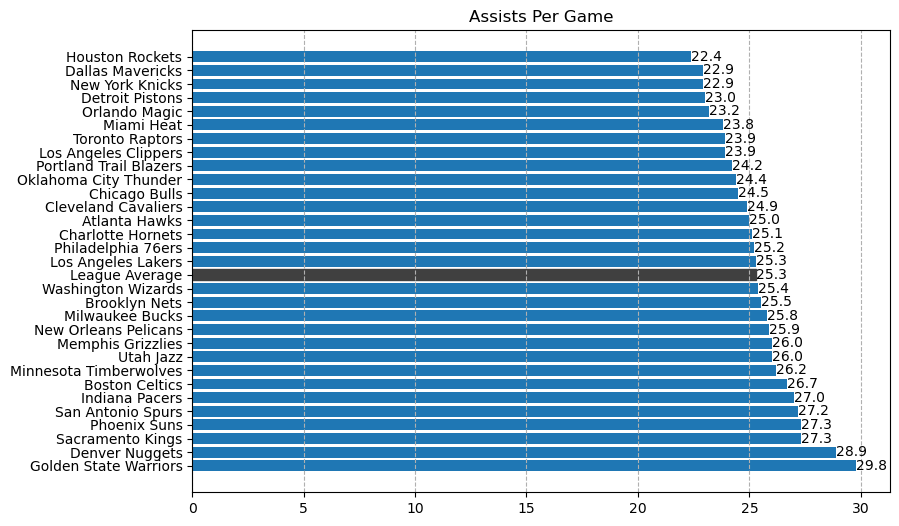

In [309]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_assist.Team, sort_assist.AST)

#making the horizontal bar
bar = ax1.barh(sort_assist.Team, sort_assist.AST)
bar[14].set_color('#404040') #highlight the average

plt.title('Assists Per Game')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_assist.AST):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')

### Steals

In [ ]:
sort_steal = stats.sort_values(by= 'STL', ascending = False)
sort_steal

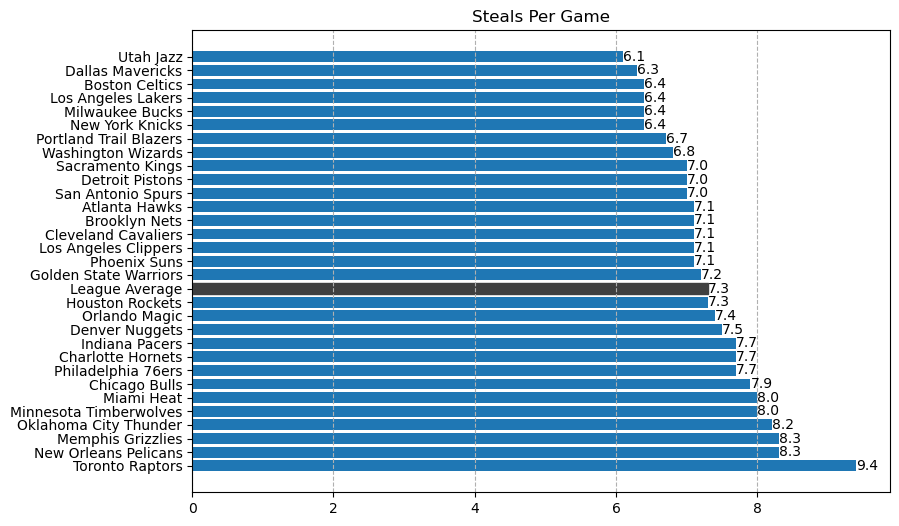

In [308]:
#making the grid
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot(111)

#ax1.barh(sort_steal.Team, sort_steal.STL)

#making the horizontal bar
bar = ax1.barh(sort_steal.Team, sort_steal.STL)
bar[13].set_color('#404040') #highlight the average

plt.title('Steals Per Game')

#gridlines
ax1.xaxis.grid(linestyle = '--')

#value labels
for pY, pX in enumerate(sort_steal.STL):
    ax1.annotate(pX, xy=(pX,pY), va = 'center')